In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("MNIST dataset/mnist_train.csv")
df_test = pd.read_csv("MNIST dataset/mnist_test.csv")

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from tensorflow import keras 

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [7]:
from tensorflow import keras

In [8]:
from tensorflow.keras.datasets import mnist 

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In c:\anaconda\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\anaconda\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\anaconda\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\anaconda\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\anaconda\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

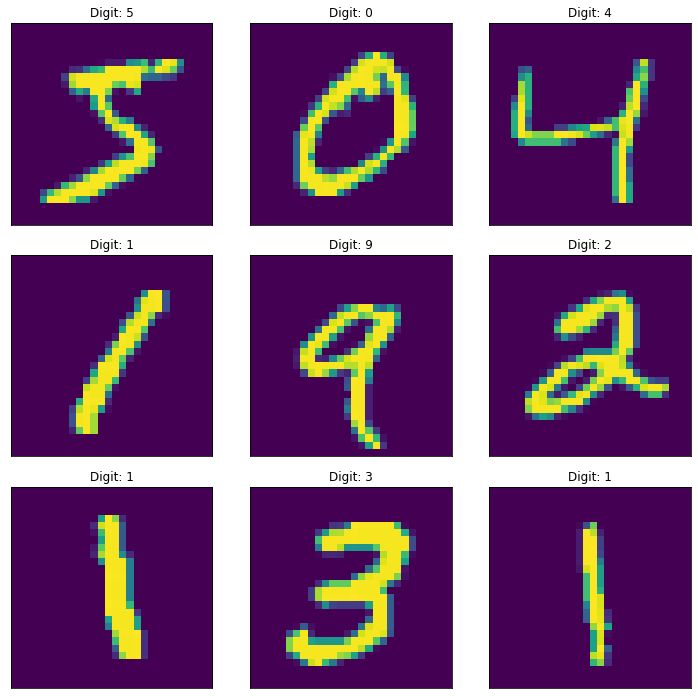

In [11]:
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.shape[0]

60000

In [14]:
img_rows = X_train.shape[1]

In [15]:
img_columns = X_train.shape[2]

In [16]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_columns, 1)

In [17]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_columns, 1)

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
type(X_train)

numpy.ndarray

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [23]:
number_of_categories = 10
y_train = keras.utils.to_categorical(y_train, number_of_categories)
y_test = keras.utils.to_categorical(y_test, number_of_categories)

In [24]:
len(y_train)

60000

In [25]:
len(y_test)

10000

In [26]:
from tensorflow.keras.layers import Conv2D

In [27]:
X_train.shape

(60000, 28, 28, 1)

In [28]:
input_shape = (28, 28, 1)

In [29]:
input_shape 

(28, 28, 1)

In [30]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape, padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'],
             validation_data = (X_test, y_test))

In [32]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2495 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0854 - accuracy: 0.9736
Epoch 3/5
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0533 - accuracy: 0.9834
Epoch 4/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0388 - accuracy: 0.9879
Epoch 5/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0272 - accuracy: 0.9913


In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape, padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'],
             validation_data = (X_test, y_test), verbose = 1)

In [34]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 376us/sample - loss: 0.1863 - accuracy: 0.9430
Epoch 2/5
60000/60000 [==============================] - 22s 371us/sample - loss: 0.0516 - accuracy: 0.9837- loss: 0.0515 - accuracy: 0.
Epoch 3/5
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0346 - accuracy: 0.9891
Epoch 4/5
60000/60000 [==============================] - 23s 387us/sample - loss: 0.0263 - accuracy: 0.9917
Epoch 5/5
60000/60000 [==============================] - 25s 416us/sample - loss: 0.0198 - accuracy: 0.9940


In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape, padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'],
             validation_data = (X_test, y_test), verbose = 1)

In [37]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 397us/sample - loss: 0.2248 - accuracy: 0.9283
Epoch 2/5
60000/60000 [==============================] - 24s 394us/sample - loss: 0.0703 - accuracy: 0.9786s - loss: 0.0700 - 
Epoch 3/5
60000/60000 [==============================] - 25s 420us/sample - loss: 0.0518 - accuracy: 0.9839
Epoch 4/5
60000/60000 [==============================] - 25s 413us/sample - loss: 0.0437 - accuracy: 0.9861
Epoch 5/5
60000/60000 [==============================] - 25s 408us/sample - loss: 0.0355 - accuracy: 0.9883


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
datagen = ImageDataGenerator()

In [40]:
datagen.fit(X_train)

In [41]:
from tqdm import tqdm

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [44]:
type(X_train)

numpy.ndarray

In [45]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [46]:
X_train /= 255
X_test /= 255

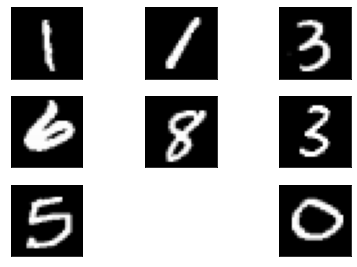

In [47]:
datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
        plt.tight_layout()
        plt.xticks([])
        plt.yticks([])
    plt.show()
    break

In [48]:
datagen = ImageDataGenerator()

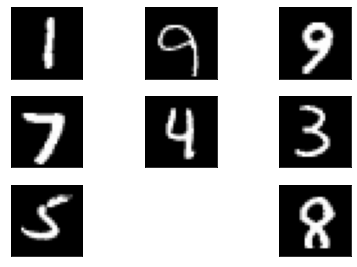

In [49]:
datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
        plt.tight_layout()
        plt.xticks([])
        plt.yticks([])
    plt.show()
    break

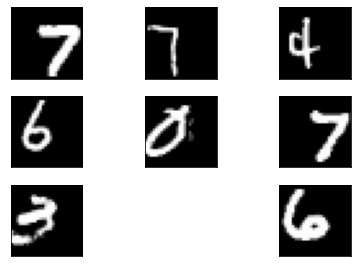

In [52]:
datagen = ImageDataGenerator(width_shift_range = [-5, 5])
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
        plt.tight_layout()
        plt.xticks([])
        plt.yticks([])
    plt.show()
    break

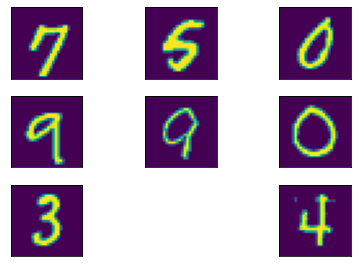

In [58]:
datagen = ImageDataGenerator(brightness_range = [1, 1])
datagen.flow(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28))
        plt.tight_layout()
        plt.xticks([])
        plt.yticks([])
    plt.show()
    break